In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib
from statsmodels.tsa.stattools import adfuller
import datetime
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.dates as mdates
import statsmodels as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
from prophet import Prophet

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
mensual = pd.read_csv('mensual.csv')
mensual['pickup_datetime'] = pd.to_datetime(mensual['pickup_datetime'])
mensual.set_index('pickup_datetime', inplace=True)

# Mensuales

In [4]:
mensual

,passenger_count,trip_distance,total_amount,duration,n_trips
pickup_datetime,,,,,
2023-09-30,2834965,3460189.95,43351361.13,2.606321e+07,2179200
2023-10-31,3576133,4382900.21,54676872.61,3.301915e+07,2736389
2023-11-30,3427883,4139501.57,51979545.55,3.135258e+07,2616757
2023-12-31,3541070,4167204.54,51955671.11,3.122333e+07,2625768
2024-01-31,3104773,3883527.49,46044469.28,2.626918e+07,2409342
2024-02-29,3124501,3959766.71,47253940.40,2.747364e+07,2448952
2024-03-31,3628203,4703052.88,55237790.42,3.265720e+07,2858661
2024-04-30,3513134,4646128.88,54112655.33,3.226751e+07,2777362
2024-05-31,3665269,4793006.98,57431400.26,3.453748e+07,2899539


In [5]:
mensual_p = mensual['n_trips']

In [6]:
mensual_p

,n_trips
pickup_datetime,
2023-09-30,2179200
2023-10-31,2736389
2023-11-30,2616757
2023-12-31,2625768
2024-01-31,2409342
2024-02-29,2448952
2024-03-31,2858661
2024-04-30,2777362
2024-05-31,2899539


In [7]:
mensual_p = mensual_p.reset_index()

In [8]:
mensual_p.rename(columns= {'pickup_datetime': 'ds', 'n_trips' : 'y'}, inplace = True)
mensual_p

,ds,y
0,2023-09-30,2179200
1,2023-10-31,2736389
2,2023-11-30,2616757
3,2023-12-31,2625768
4,2024-01-31,2409342
5,2024-02-29,2448952
6,2024-03-31,2858661
7,2024-04-30,2777362
8,2024-05-31,2899539
9,2024-06-30,2767032


## Modelo 1

In [11]:
# Instanciamos un modelo de Prophet

prophet_1 = Prophet(yearly_seasonality= True, weekly_seasonality=True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet_1.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_1.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_1 = prophet_1.predict(build_forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/qhlgby_3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/_1ild757.json
19:22:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92240', 'data', 'file=/tmp/tmp_62cw8sc/qhlgby_3.json', 'init=/tmp/tmp_62cw8sc/_1ild757.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelpbgls12z/prophet_model-20241113192247_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=92240', 'data', 'file=/tmp/tmp_62cw8sc/qhlgby_3.json', 'init=/tmp/tmp_62cw8sc/_1ild757.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelpbgls12z/prophet_model-20241113192247_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

19:22:49 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92240', 'data', 'file=/tmp/tmp_62cw8sc/qhlgby_3.json', 'init=/tmp/tmp_62cw8sc/_1ild757.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelpbgls12z/prophet_model-20241113192247_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelpbgls12z/prophet_model-20241113192247_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelpbgls12z/prophet_model-20241113192247_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [12]:
forecast_1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-30,4.129302e+06,1.581492e+06,3.256226e+06,1.607783e+05,7.043190e+06,-1.690602e+06,-5.075241e+06,2.697801e+06,-1.699337e+07,-3.393104e+07,3.004182e+05,1.530277e+07,-1.057305e+06,3.379350e+07,0.0,0.0,0.0,2.438699e+06
1,2023-10-31,4.362200e+06,1.498700e+06,3.587031e+06,7.481046e+04,7.533387e+06,-2.128566e+06,-6.232729e+06,1.709511e+06,-4.651427e+06,-1.458811e+07,1.276022e+07,2.522861e+06,-1.096810e+07,1.217957e+07,0.0,0.0,0.0,2.233634e+06
2,2023-11-30,4.588518e+06,1.997871e+06,4.112744e+06,1.563178e+05,7.800305e+06,-1.745928e+06,-6.109643e+06,3.226192e+06,1.086182e+07,-4.499948e+06,2.308202e+07,-1.260774e+07,-2.742413e+07,7.023388e+05,0.0,0.0,0.0,2.842590e+06
3,2023-12-31,4.821556e+06,2.091878e+06,3.490841e+06,-1.000893e+05,8.221960e+06,-2.143129e+06,-5.698679e+06,1.064423e+06,-6.753021e+06,-2.047366e+07,6.115616e+06,4.609892e+06,-1.005529e+07,1.548839e+07,0.0,0.0,0.0,2.678427e+06
4,2024-01-31,5.052583e+06,1.352928e+06,2.814192e+06,6.490116e+05,8.559549e+06,-2.803577e+06,-6.543364e+06,1.369268e+06,4.573780e+06,-1.056093e+07,1.694155e+07,-7.377356e+06,-2.254762e+07,7.556972e+06,0.0,0.0,0.0,2.249007e+06
5,2024-02-29,5.267254e+06,1.711458e+06,3.184361e+06,9.393809e+05,9.031821e+06,-2.597893e+06,-6.384908e+06,1.093124e+06,1.086182e+07,-4.499948e+06,2.308202e+07,-1.345971e+07,-3.085879e+07,-1.302920e+05,0.0,0.0,0.0,2.669360e+06
6,2024-03-31,5.501609e+06,9.753148e+05,3.425924e+06,1.227191e+06,9.527871e+06,-3.098719e+06,-6.305441e+06,-3.767960e+04,-6.753021e+06,-2.047366e+07,6.115616e+06,3.654302e+06,-7.154975e+06,1.570385e+07,0.0,0.0,0.0,2.402890e+06
7,2024-04-30,5.730352e+06,1.942686e+06,3.358231e+06,1.330259e+06,9.926735e+06,-2.715952e+06,-7.029101e+06,2.060534e+06,-4.651427e+06,-1.458811e+07,1.276022e+07,1.935476e+06,-1.171617e+07,9.796431e+06,0.0,0.0,0.0,3.014401e+06
8,2024-05-31,5.969650e+06,2.154032e+06,3.512630e+06,1.947102e+06,1.028197e+07,-3.423815e+06,-7.627675e+06,1.229071e+06,-8.538352e+05,-9.629888e+06,6.290224e+06,-2.569979e+06,-1.377381e+07,1.139336e+07,0.0,0.0,0.0,2.545835e+06
9,2024-06-30,6.202241e+06,2.437727e+06,4.107818e+06,5.477977e+05,1.044828e+07,-3.093590e+06,-6.991436e+06,8.650650e+05,-6.753021e+06,-2.047366e+07,6.115616e+06,3.659431e+06,-5.773723e+06,1.330091e+07,0.0,0.0,0.0,3.108651e+06


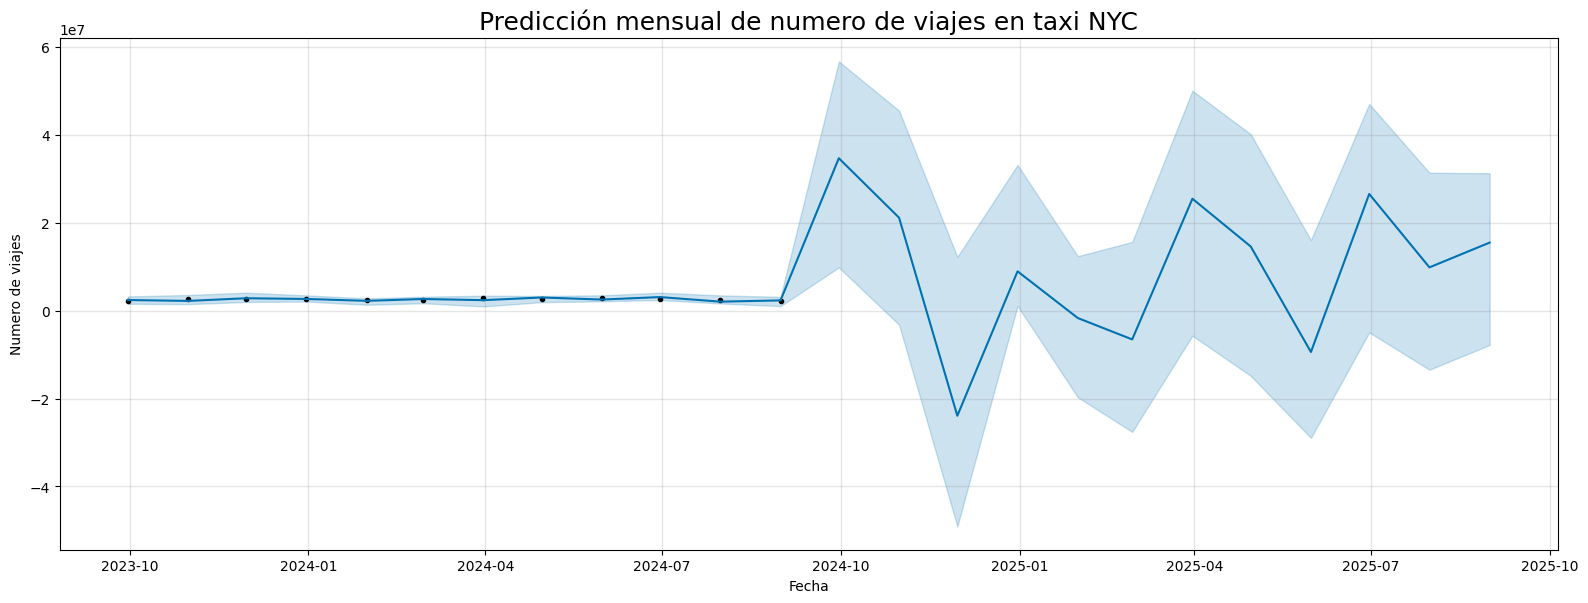

In [13]:
# plot forecasts

prophet_1.plot(forecast_1, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

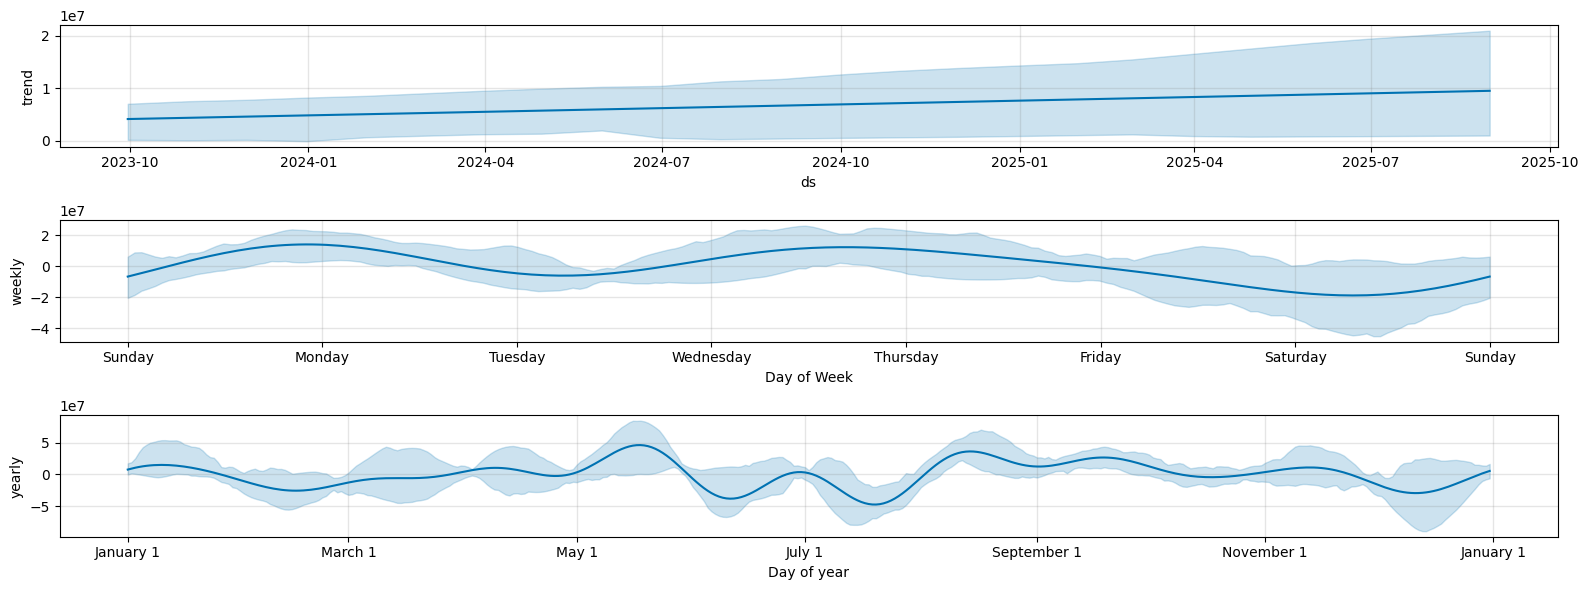

In [14]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_1.plot_components(forecast_1, figsize=(16,6))

## Modelo 2

In [15]:
# Instanciamos un modelo de Prophet

prophet_2 = Prophet(yearly_seasonality= True,
                  daily_seasonality=True,
                  weekly_seasonality=True,
                  uncertainty_samples = 30,
                  mcmc_samples=30,
                  interval_width= 0.5)

# Entrenamos el modelo
prophet_2.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_2.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_2 = prophet_2.predict(build_forecast)

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/f0et55ux.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/w3498rss.json
19:24:28 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48430', 'data', 'file=/tmp/tmp_62cw8sc/f0et55ux.json', 'init=/tmp/tmp_62cw8sc/w3498rss.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeltt443t6u/prophet_model-20241113192428_1.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=48430', 'data', 'file=/tmp/tmp_62cw8sc/f0et55ux.json', 'init=/tmp/tmp_62cw8sc/w3498rss.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeltt443t6u/prophet_model-20241113192428_2.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

19:24:30 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=48430', 'data', 'file=/tmp/tmp_62cw8sc/f0et55ux.json', 'init=/tmp/tmp_62cw8sc/w3498rss.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeltt443t6u/prophet_model-20241113192428_1.csv', 'method=sample', 'num_samples=15', 'num_warmup=15', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modeltt443t6u/prophet_model-20241113192428_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modeltt443t6u/prophet_model-20241113192428_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 15
    num_warmup = 15
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [16]:
forecast_2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-30,2.626433e+06,1.010833e+06,3.473560e+06,-4.174387e+06,1.232465e+07,-5.043767e+05,-1.013442e+07,5.979306e+06,-6.442941e+06,...,-5.488382e+06,-2.001623e+07,1.237683e+07,1.142695e+07,-1.936196e+06,2.594646e+07,0.0,0.0,0.0,2.122056e+06
1,2023-10-31,3.309034e+06,1.628542e+06,3.816897e+06,-3.395837e+06,1.388969e+07,-1.006894e+06,-1.061606e+07,5.059520e+06,-6.442941e+06,...,-7.810032e+06,-2.597789e+07,8.000806e+06,1.324608e+07,1.163461e+06,3.046642e+07,0.0,0.0,0.0,2.302140e+06
2,2023-11-30,3.965996e+06,1.991570e+06,3.758376e+06,-2.657154e+06,1.540741e+07,-1.054888e+06,-1.171435e+07,5.543765e+06,-6.442941e+06,...,-5.543125e+05,-1.376171e+07,1.243527e+07,5.942366e+06,-8.141647e+06,2.119790e+07,0.0,0.0,0.0,2.911108e+06
3,2023-12-31,4.643077e+06,1.227371e+06,3.843549e+06,-1.892211e+06,1.696428e+07,-2.127360e+06,-1.334689e+07,5.650146e+06,-6.442941e+06,...,2.439583e+07,5.294145e+06,4.243780e+07,-2.008024e+07,-3.726780e+07,-2.888785e+06,0.0,0.0,0.0,2.515718e+06
4,2024-01-31,5.315628e+06,1.767338e+06,3.824101e+06,-2.053871e+06,1.852008e+07,-2.733821e+06,-1.666472e+07,4.066822e+06,-6.442941e+06,...,-3.725065e+05,-1.776138e+07,1.810053e+07,4.081627e+06,-1.668701e+07,2.407761e+07,0.0,0.0,0.0,2.581807e+06
5,2024-02-29,5.944967e+06,6.157781e+05,2.956452e+06,-2.146381e+06,2.010071e+07,-3.580006e+06,-1.774100e+07,5.387857e+06,-6.442941e+06,...,-5.543125e+05,-1.376171e+07,1.243527e+07,3.417247e+06,-8.190460e+06,1.763577e+07,0.0,0.0,0.0,2.364961e+06
6,2024-03-31,6.617739e+06,2.007111e+06,4.090434e+06,-2.477641e+06,2.158399e+07,-3.407468e+06,-1.810999e+07,6.486998e+06,-6.442941e+06,...,2.439583e+07,5.294145e+06,4.243780e+07,-2.136035e+07,-3.631075e+07,-6.927718e+06,0.0,0.0,0.0,3.210271e+06
7,2024-04-30,7.268625e+06,1.614925e+06,3.789638e+06,-3.381763e+06,2.270363e+07,-4.415317e+06,-1.898582e+07,5.873079e+06,-6.442941e+06,...,-7.810032e+06,-2.597789e+07,8.000806e+06,9.837656e+06,-4.518070e+06,3.096548e+07,0.0,0.0,0.0,2.853308e+06
8,2024-05-31,7.943015e+06,2.018489e+06,3.691569e+06,-4.324956e+06,2.432529e+07,-5.160839e+06,-2.088644e+07,6.583207e+06,-6.442941e+06,...,-1.668917e+07,-2.427447e+07,-4.472125e+06,1.797127e+07,-3.795385e+05,2.587174e+07,0.0,0.0,0.0,2.782176e+06
9,2024-06-30,8.595913e+06,1.406803e+06,3.350535e+06,-5.247055e+06,2.584690e+07,-5.971864e+06,-2.195680e+07,6.568269e+06,-6.442941e+06,...,2.439583e+07,5.294145e+06,4.243780e+07,-2.392475e+07,-4.018254e+07,-1.098368e+07,0.0,0.0,0.0,2.624049e+06


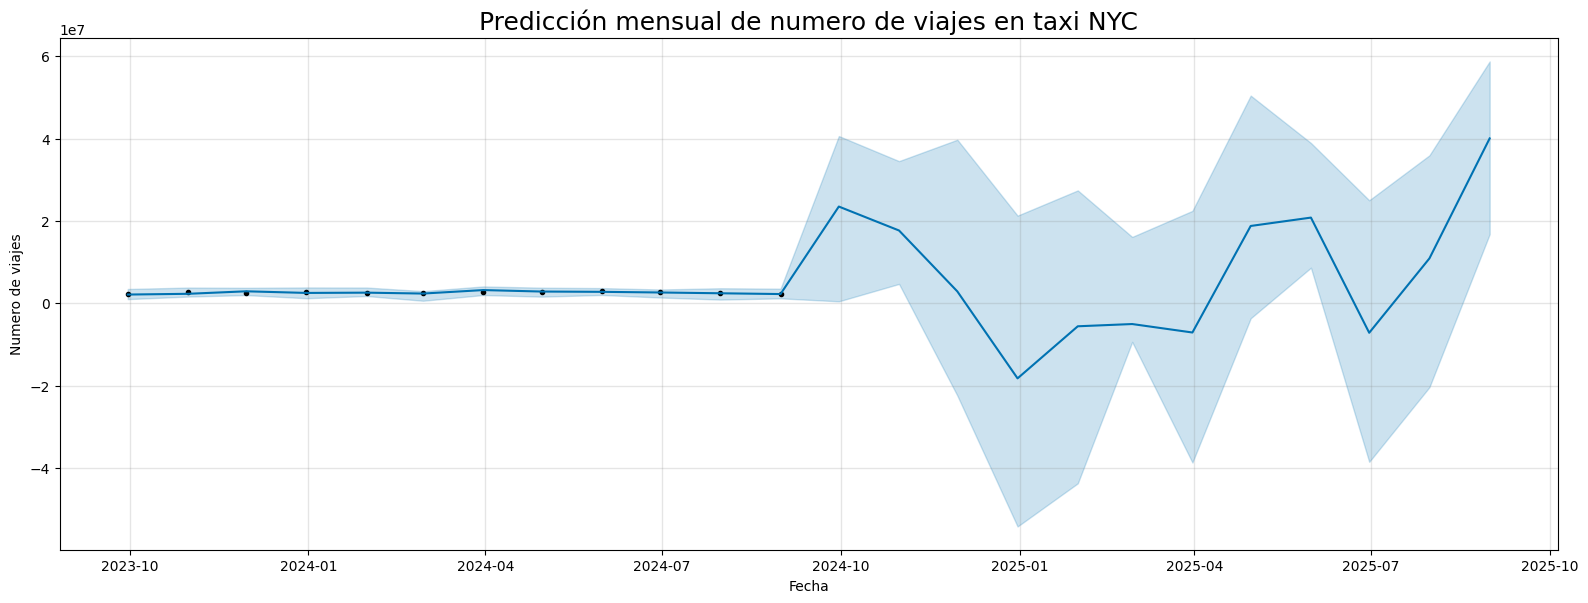

In [17]:
# plot forecasts

prophet_2.plot(forecast_2, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

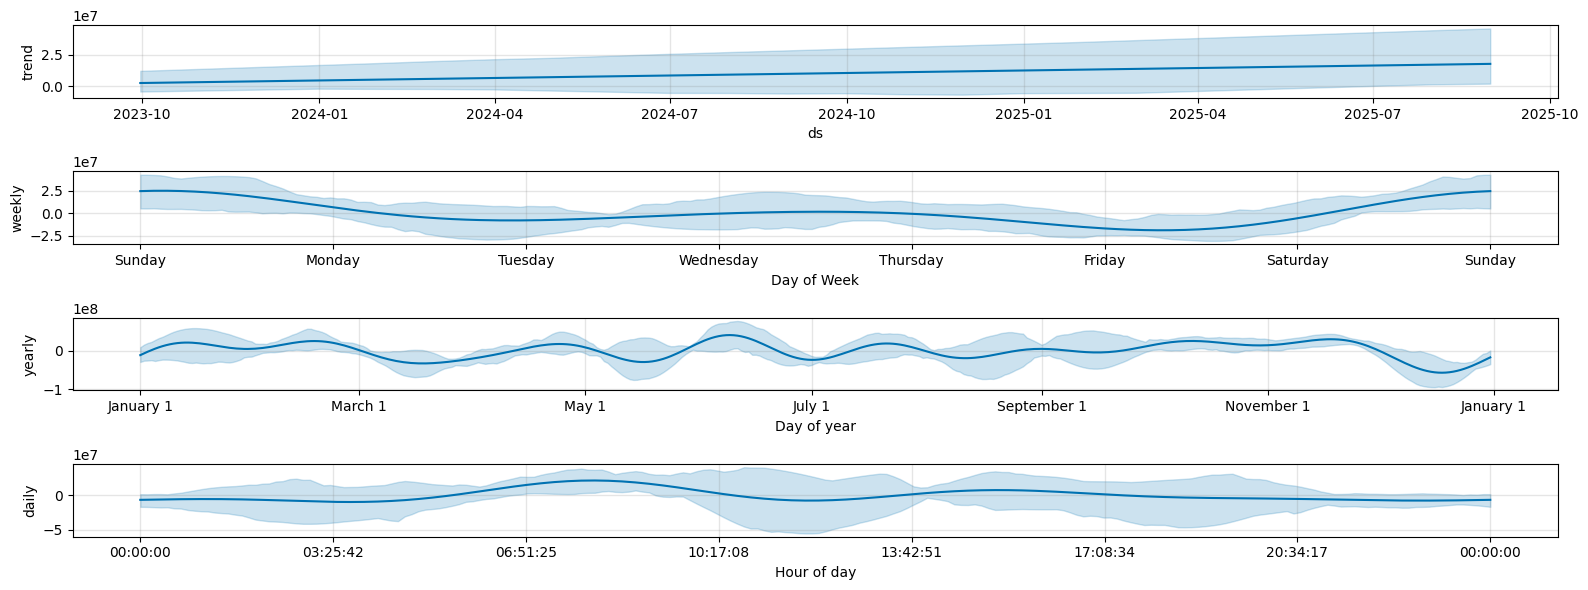

In [19]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_2.plot_components(forecast_2, figsize=(16,6))

## Modelo 3

In [22]:
# Instanciamos un modelo de Prophet

prophet_3 = Prophet(yearly_seasonality= True, daily_seasonality=True, weekly_seasonality=True, uncertainty_samples = 20, mcmc_samples=20, interval_width= 0.5)

# Entrenamos el modelo
prophet_3.fit(mensual_p)

# Construimos un dataframe con los x valores futuros que querámos predecir. 12 meses.
build_forecast = prophet_3.make_future_dataframe(periods=12, freq='M') #

# Predecimos
forecast_3 = prophet_3.predict(build_forecast)

INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/cdh5ru5o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/4ny3gf1j.json
19:26:04 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72486', 'data', 'file=/tmp/tmp_62cw8sc/cdh5ru5o.json', 'init=/tmp/tmp_62cw8sc/4ny3gf1j.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeljryp_st3/prophet_model-20241113192604_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=72486', 'data', 'file=/tmp/tmp_62cw8sc/cdh5ru5o.json', 'init=/tmp/tmp_62cw8sc/4ny3gf1j.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeljryp_st3/prophet_model-20241113192604_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

19:26:05 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=72486', 'data', 'file=/tmp/tmp_62cw8sc/cdh5ru5o.json', 'init=/tmp/tmp_62cw8sc/4ny3gf1j.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modeljryp_st3/prophet_model-20241113192604_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modeljryp_st3/prophet_model-20241113192604_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modeljryp_st3/prophet_model-20241113192604_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [23]:
forecast_3

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-09-30,1.342651e+06,1.323945e+06,2.427801e+06,-9.081102e+06,7.251812e+06,5.172377e+05,-5.263285e+06,1.091745e+07,6.379812e+06,...,-5.520114e+06,-1.861408e+07,2.159054e+06,-3.424605e+05,-7.844039e+06,1.242268e+07,0.0,0.0,0.0,1.859889e+06
1,2023-10-31,3.915335e+05,2.208702e+06,3.415682e+06,-9.916500e+06,6.358589e+06,2.379299e+06,-3.552791e+06,1.278953e+07,6.379812e+06,...,-1.997938e+06,-1.621415e+07,1.499744e+07,-2.002575e+06,-1.466589e+07,1.073488e+07,0.0,0.0,0.0,2.770832e+06
2,2023-11-30,-5.310349e+05,2.372517e+06,2.867642e+06,-1.072889e+07,5.418325e+06,3.226051e+06,-2.772165e+06,1.312443e+07,6.379812e+06,...,-1.011588e+06,-1.142206e+07,9.198113e+06,-2.142174e+06,-1.234329e+07,1.000100e+07,0.0,0.0,0.0,2.695016e+06
3,2023-12-31,-1.484762e+06,1.997660e+06,3.008287e+06,-1.124199e+07,4.333827e+06,4.446288e+06,-1.453014e+06,1.365740e+07,6.379812e+06,...,-7.877941e+06,-2.276698e+07,7.463983e+06,5.944416e+06,-4.005762e+06,1.691057e+07,0.0,0.0,0.0,2.961526e+06
4,2024-01-31,-2.441059e+06,1.924717e+06,2.862023e+06,-1.173690e+07,3.247413e+06,4.796048e+06,-1.233250e+06,1.381146e+07,6.379812e+06,...,7.619968e+06,-1.347402e+07,1.926899e+07,-9.203733e+06,-2.177022e+07,1.246850e+07,0.0,0.0,0.0,2.354989e+06
5,2024-02-29,-3.336677e+06,2.071463e+06,3.167328e+06,-1.217026e+07,2.232023e+06,5.884936e+06,1.810775e+05,1.457752e+07,6.379812e+06,...,-1.011588e+06,-1.142206e+07,9.198113e+06,5.167108e+05,-1.181141e+07,1.167868e+07,0.0,0.0,0.0,2.548258e+06
6,2024-03-31,-4.294226e+06,2.441724e+06,3.485266e+06,-1.262556e+07,1.125881e+06,6.992116e+06,1.384992e+06,1.561393e+07,6.379812e+06,...,-7.877941e+06,-2.276698e+07,7.463983e+06,8.490244e+06,-2.486230e+06,2.106159e+07,0.0,0.0,0.0,2.697890e+06
7,2024-04-30,-5.219738e+06,2.386833e+06,3.264107e+06,-1.304388e+07,1.851456e+05,7.972300e+06,2.357881e+06,1.585574e+07,6.379812e+06,...,-1.997938e+06,-1.621415e+07,1.499744e+07,3.590425e+06,-6.816651e+06,1.785290e+07,0.0,0.0,0.0,2.752561e+06
8,2024-05-31,-6.173287e+06,2.555313e+06,3.325327e+06,-1.346349e+07,-6.784132e+05,9.109394e+06,3.957120e+06,1.608908e+07,6.379812e+06,...,2.024824e+07,3.664831e+06,3.625026e+07,-1.751866e+07,-2.654145e+07,-1.012582e+07,0.0,0.0,0.0,2.936107e+06
9,2024-06-30,-7.091271e+06,2.389640e+06,3.393763e+06,-1.430059e+07,-1.637728e+06,1.037333e+07,4.384673e+06,1.823497e+07,6.379812e+06,...,-7.877941e+06,-2.276698e+07,7.463983e+06,1.187146e+07,1.177397e+06,2.232579e+07,0.0,0.0,0.0,3.282062e+06


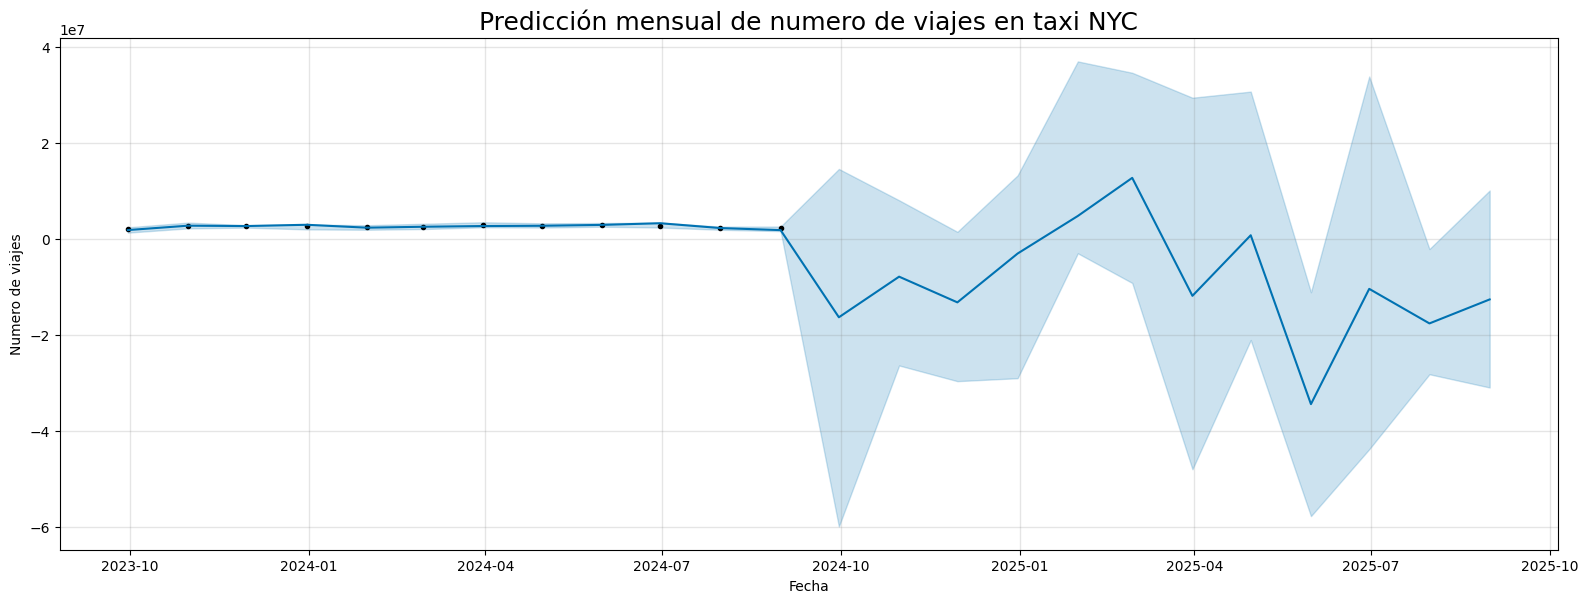

In [24]:
# plot forecasts

prophet_3.plot(forecast_3, xlabel='Fecha', ylabel='Numero de viajes', figsize = (16,6))
plt.title('Predicción mensual de numero de viajes en taxi NYC', fontsize = 18)
plt.show()

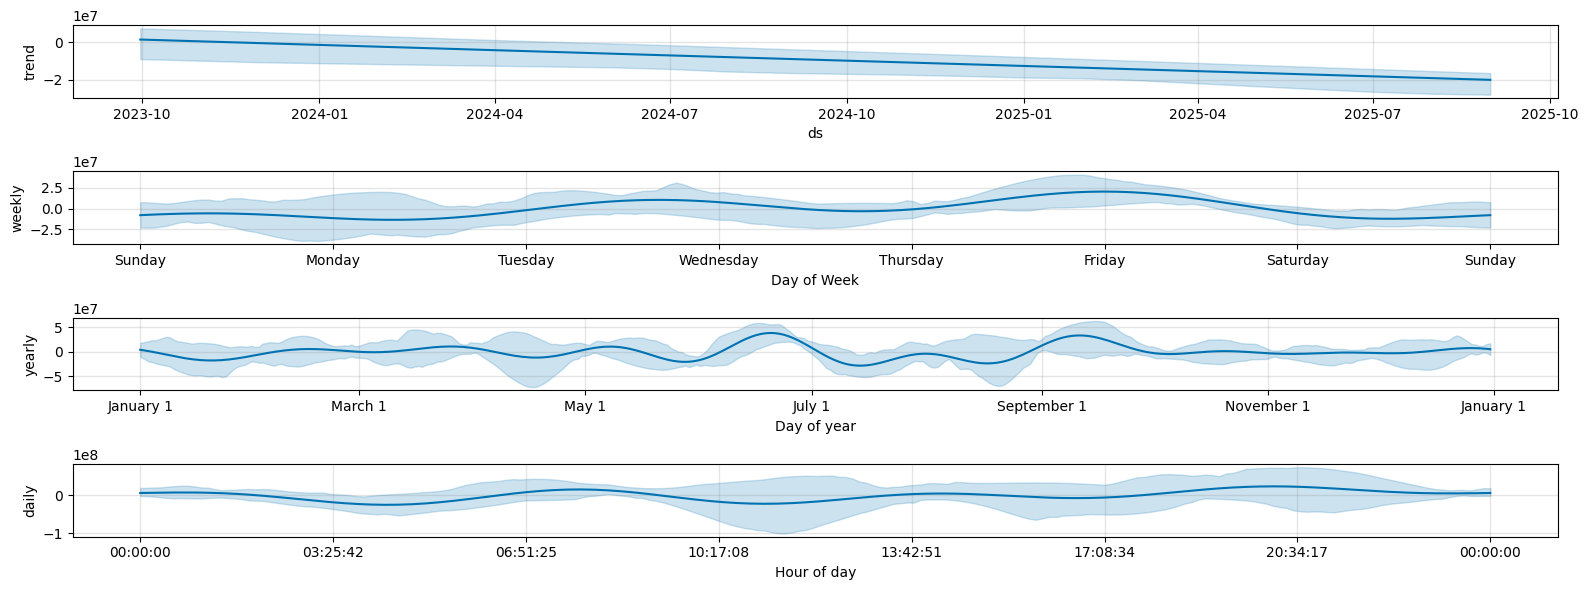

In [26]:
# Ploteamos los componentes de nuestra serie de tiempo

components = prophet_3.plot_components(forecast_3, figsize=(16,6))

# Evaluacion

## Modelo 3

In [27]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [54]:
df_cv_3 = cross_validation(prophet_3, initial = '60 days', horizon = '60 days')

INFO:prophet:Making 8 forecasts with cutoffs between 2023-12-05 00:00:00 and 2024-07-02 00:00:00


  0%|          | 0/8 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 1.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/3kjtesl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/6eyjur34.json
20:03:37 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=33033', 'data', 'file=/tmp/tmp_62cw8sc/3kjtesl6.json', 'init=/tmp/tmp_62cw8sc/6eyjur34.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_model6ogadb0l/prophet_model-20241113200337_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=33033', 'data', 'file=/tmp/tmp_62cw8sc/3kjtesl6.json', 'init=/tmp/tmp_62cw8sc/6eyjur34.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_model6ogadb0l/prophet_model-20241113200337_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:37 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=33033', 'data', 'file=/tmp/tmp_62cw8sc/3kjtesl6.json', 'init=/tmp/tmp_62cw8sc/6eyjur34.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_model6ogadb0l/prophet_model-20241113200337_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_model6ogadb0l/prophet_model-20241113200337_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_model6ogadb0l/prophet_model-20241113200337_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79149', 'data', 'file=/tmp/tmp_62cw8sc/3t00zc8k.json', 'init=/tmp/tmp_62cw8sc/3iwoe8am.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelaecv25j1/prophet_model-20241113200337_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=79149', 'data', 'file=/tmp/tmp_62cw8sc/3t00zc8k.json', 'init=/tmp/tmp_62cw8sc/3iwoe8am.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelaecv25j1/prophet_model-20241113200337_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:38 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=79149', 'data', 'file=/tmp/tmp_62cw8sc/3t00zc8k.json', 'init=/tmp/tmp_62cw8sc/3iwoe8am.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelaecv25j1/prophet_model-20241113200337_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelaecv25j1/prophet_model-20241113200337_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelaecv25j1/prophet_model-20241113200337_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/nupj7izh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/jlc8br44.json
20:03:38 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=81808', 'data', 'file=/tmp/tmp_62cw8sc/nupj7izh.json', 'init=/tmp/tmp_62cw8sc/jlc8br44.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelte1pgroy/prophet_model-20241113200339_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=81808', 'data', 'file=/tmp/tmp_62cw8sc/nupj7izh.json', 'init=/tmp/tmp_62cw8sc/jlc8br44.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelte1pgroy/prophet_model-20241113200339_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:39 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=81808', 'data', 'file=/tmp/tmp_62cw8sc/nupj7izh.json', 'init=/tmp/tmp_62cw8sc/jlc8br44.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelte1pgroy/prophet_model-20241113200339_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelte1pgroy/prophet_model-20241113200339_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelte1pgroy/prophet_model-20241113200339_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/yi8he_ps.json
20:03:40 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29234', 'data', 'file=/tmp/tmp_62cw8sc/xfknwgs8.json', 'init=/tmp/tmp_62cw8sc/yi8he_ps.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelt5lmo_25/prophet_model-20241113200340_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=29234', 'data', 'file=/tmp/tmp_62cw8sc/xfknwgs8.json', 'init=/tmp/tmp_62cw8sc/yi8he_ps.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelt5lmo_25/prophet_model-20241113200340_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:40 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=29234', 'data', 'file=/tmp/tmp_62cw8sc/xfknwgs8.json', 'init=/tmp/tmp_62cw8sc/yi8he_ps.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelt5lmo_25/prophet_model-20241113200340_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelt5lmo_25/prophet_model-20241113200340_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelt5lmo_25/prophet_model-20241113200340_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/cwxe7gdw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/1zvah_pn.json
20:03:41 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92280', 'data', 'file=/tmp/tmp_62cw8sc/cwxe7gdw.json', 'init=/tmp/tmp_62cw8sc/1zvah_pn.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelmnez9w9x/prophet_model-20241113200341_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=92280', 'data', 'file=/tmp/tmp_62cw8sc/cwxe7gdw.json', 'init=/tmp/tmp_62cw8sc/1zvah_pn.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelmnez9w9x/prophet_model-20241113200341_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:42 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=92280', 'data', 'file=/tmp/tmp_62cw8sc/cwxe7gdw.json', 'init=/tmp/tmp_62cw8sc/1zvah_pn.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelmnez9w9x/prophet_model-20241113200341_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelmnez9w9x/prophet_model-20241113200341_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelmnez9w9x/prophet_model-20241113200341_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/9xn5uhfa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/lcoghm6t.json
20:03:43 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69529', 'data', 'file=/tmp/tmp_62cw8sc/9xn5uhfa.json', 'init=/tmp/tmp_62cw8sc/lcoghm6t.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modellx1zwt6o/prophet_model-20241113200343_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=69529', 'data', 'file=/tmp/tmp_62cw8sc/9xn5uhfa.json', 'init=/tmp/tmp_62cw8sc/lcoghm6t.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modellx1zwt6o/prophet_model-20241113200343_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:45 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=69529', 'data', 'file=/tmp/tmp_62cw8sc/9xn5uhfa.json', 'init=/tmp/tmp_62cw8sc/lcoghm6t.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modellx1zwt6o/prophet_model-20241113200343_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modellx1zwt6o/prophet_model-20241113200343_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modellx1zwt6o/prophet_model-20241113200343_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/7oe6q7z4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/hfhc90ph.json
20:03:45 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77340', 'data', 'file=/tmp/tmp_62cw8sc/7oe6q7z4.json', 'init=/tmp/tmp_62cw8sc/hfhc90ph.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modela652toyz/prophet_model-20241113200346_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=77340', 'data', 'file=/tmp/tmp_62cw8sc/7oe6q7z4.json', 'init=/tmp/tmp_62cw8sc/hfhc90ph.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modela652toyz/prophet_model-20241113200346_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:47 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=77340', 'data', 'file=/tmp/tmp_62cw8sc/7oe6q7z4.json', 'init=/tmp/tmp_62cw8sc/hfhc90ph.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modela652toyz/prophet_model-20241113200346_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modela652toyz/prophet_model-20241113200346_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modela652toyz/prophet_model-20241113200346_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:cmd: /usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin info
cwd: None
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/w5dgpgc6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_62cw8sc/191sfu05.json
20:03:47 - cmdstanpy - INFO - CmdStan start processing
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=88247', 'data', 'file=/tmp/tmp_62cw8sc/w5dgpgc6.json', 'init=/tmp/tmp_62cw8sc/191sfu05.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelol5tpwe3/prophet_model-20241113200347_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=2', 'random', 'seed=88247', 'data', 'file=/tmp/tmp_62cw8sc/w5dgpgc6.json', 'init=/tmp/tmp_62cw8sc/191sfu05.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelol5tpwe3/prophet_model-20241113200347_2.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanp

20:03:48 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'id=1', 'random', 'seed=88247', 'data', 'file=/tmp/tmp_62cw8sc/w5dgpgc6.json', 'init=/tmp/tmp_62cw8sc/191sfu05.json', 'output', 'file=/tmp/tmp_62cw8sc/prophet_modelol5tpwe3/prophet_model-20241113200347_1.csv', 'method=sample', 'num_samples=10', 'num_warmup=10', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmp_62cw8sc/prophet_modelol5tpwe3/prophet_model-20241113200347_1.csv
 console_msgs (if any):
	/tmp/tmp_62cw8sc/prophet_modelol5tpwe3/prophet_model-20241113200347_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 10
    num_warmup = 10
    save_warmup = 0 (Default)
    thin = 1 (Default)


In [55]:
df_cv_3


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-12-31,1.962907e+07,-4.977241e+07,8.705697e+07,2625768,2023-12-05
1,2024-01-31,-3.060234e+07,-8.168394e+07,5.879553e+07,2409342,2023-12-05
2,2024-01-31,4.046802e+07,-7.864526e+05,9.458594e+07,2409342,2024-01-04
3,2024-02-29,3.810623e+07,3.255013e+06,7.941343e+07,2448952,2024-01-04
4,2024-02-29,3.007854e+07,-8.272627e+06,6.551549e+07,2448952,2024-02-03
5,2024-03-31,3.156560e+07,-2.021289e+07,1.116089e+08,2858661,2024-02-03
6,2024-03-31,-3.677982e+07,-7.679098e+07,1.815845e+06,2858661,2024-03-04
7,2024-04-30,-2.154453e+07,-7.514538e+07,4.185467e+07,2777362,2024-03-04
8,2024-04-30,3.694868e+07,1.172774e+05,9.187567e+07,2777362,2024-04-03
9,2024-05-31,6.180645e+07,-1.228359e+07,1.197656e+08,2899539,2024-04-03


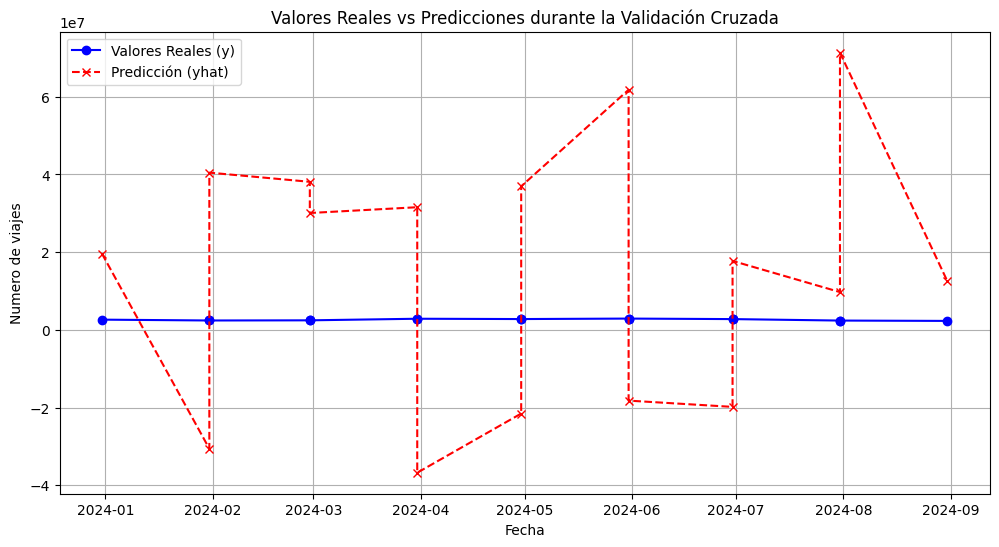

In [56]:
plt.figure(figsize=(12, 6))

plt.plot(df_cv_3['ds'], df_cv_3['y'], label='Valores Reales (y)', color='blue', marker='o')
plt.plot(df_cv_3['ds'], df_cv_3['yhat'], label='Predicción (yhat)', color='red', linestyle='--', marker='x')

plt.xlabel('Fecha')
plt.ylabel('Numero de viajes')
plt.title('Valores Reales vs Predicciones durante la Validación Cruzada')
plt.legend()
plt.grid(True)
plt.show()


In [57]:
df_p_3 = performance_metrics(df_cv_3)
df_p_3.describe()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
count,9,9.000000e+00,9.000000e+00,9.000000e+00,9.000000,9.000000,9.000000,9.000000
mean,44 days 10:40:00,1.251766e+15,3.047426e+07,2.991500e+07,11.690239,11.588678,1.688193,0.685185
std,16 days 03:11:42.148646023,1.462977e+15,1.906494e+07,1.879702e+07,7.734538,7.745370,0.244817,0.428535
min,26 days 00:00:00,5.372892e+13,7.330001e+06,7.330001e+06,3.067266,3.067266,1.210620,0.000000
25%,28 days 00:00:00,3.351463e+14,1.830700e+07,1.804756e+07,6.347961,6.347961,1.613450,0.500000
50%,56 days 00:00:00,8.351380e+14,2.889876e+07,2.868017e+07,10.833607,10.042092,1.758457,1.000000
75%,58 days 00:00:00,1.395784e+15,3.736019e+07,3.728949e+07,14.241409,14.241409,1.870346,1.000000
max,60 days 00:00:00,4.753728e+15,6.894729e+07,6.894729e+07,28.851243,28.851243,1.910378,1.000000


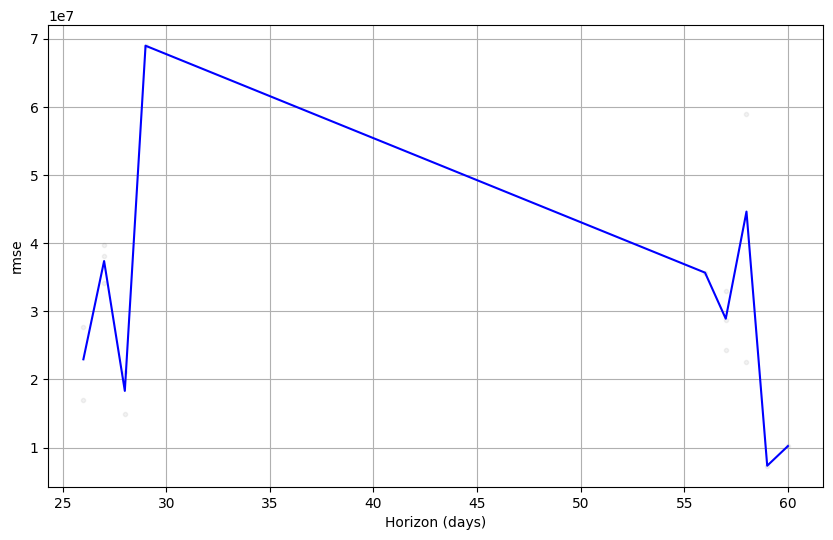

In [58]:
fig = plot_cross_validation_metric(df_cv_3, metric='rmse')

In [59]:
print('El RMSE es:', df_p_3.rmse.mean())

El RMSE es: 30474258.06660311


In [62]:
df_p = performance_metrics(df_cv_3, rolling_window = 1)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,60 days,1.161218e+15,3.407665e+07,3.014317e+07,11.520306,10.662151,1.743127,0.75
